# Part I - Student Performance Data Exploration
## by Dorothy Kambua Thomas

## Introduction
> The Student Examination Performance dataset consist of data about the performance of various students in school. The data includes various information about each student:

>1. Gender
>2. Race/ethnicity
>3. Parental level of education
>4. Lunch details eg, standard, free, or reduced
>5. Completion of test preparation course
>6. Test scores

> To add on this, I also added a total score, which is a sum of all the test scores, inorder to analyze the data further. This analysis is solely to investigate the relationship between the variables mentioned above and the overall total score, which represents the student's overall performance.

## Preliminary Wrangling


In [60]:
# importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Loading the Student Examination dataset and exploring its properties.

In [61]:
# Loading the dataset into a pandas dataframe
performance_data=pd.read_csv('StudentsPerformance.csv')


#### Next, loading the first and last few rows to have a brief view of the dataset

In [62]:
performance_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
9,female,group B,high school,free/reduced,none,38,60,50,148


In [63]:
performance_data.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223
999,female,group D,some college,free/reduced,none,77,86,86,249


### The structure of this dataset

In [64]:
performance_data.shape

(1000, 9)

#### Therefore, the data set has 1000 rows and 9 columns in total.

### The variables of interest in this dataset
I will assess the dataset further to see the variables of interest, information about the variables,and perform data cleaning incase of any issues noted in the data to help with this exploration.

In [65]:
#variables present and their details
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
total score                    1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


#### The dataset is fairly clean, as their are no missing entries in the data. There is a total of 1000 entries in the dataset.

#### I will rename the column names to brief names.

In [66]:
performance_data.rename(columns = {'race/ethnicity':'ethnicity','parental level of education':'parent_education','test preparation course':'test_completion','reading score':'reading','math score':'math','writing score':'writing','total score':'total'}, inplace = True)

In [67]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender              1000 non-null object
ethnicity           1000 non-null object
parent_education    1000 non-null object
lunch               1000 non-null object
test_completion     1000 non-null object
math                1000 non-null int64
reading             1000 non-null int64
writing             1000 non-null int64
total               1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [68]:
#Checking for duplicates and dropping duplicates if any.
sum(performance_data.duplicated())

0

#### There are no duplicates in the data.
Next, finding the unique entries in columns gender, ethnicity, parent_education, lunch, and test_completion and fixing redundancy, if any.

In [69]:
performance_data.ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'], dtype=object)

In [70]:
performance_data.gender.unique()

array(['female', 'male'], dtype=object)

In [71]:
performance_data.parent_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'], dtype=object)

In [72]:
performance_data.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [73]:
performance_data.test_completion.unique()

array(['none', 'completed'], dtype=object)

## Features in the dataset that will help support this data exploration
I note that all the nine variables are important to perform analysis on the features which mostly affect the student's total score and describing the relationship between the variables. Therefore, I will be using all the variables in this data analysis. 


However, my key feature of interest is the total score variable since it represents the overall performance of each student.

I will perform univariate, bivariate and multivariate exploration.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables. 

#### First, I will check the counts of various gender, lunch, test_completion and parent_education.

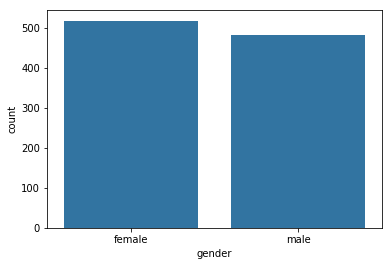

In [74]:
#counts of gender
base_color=sb.color_palette()[0]
sb.countplot(data=performance_data, x="gender",color=base_color);

#### It is clear that the female counts exceed the male counts by around 50.

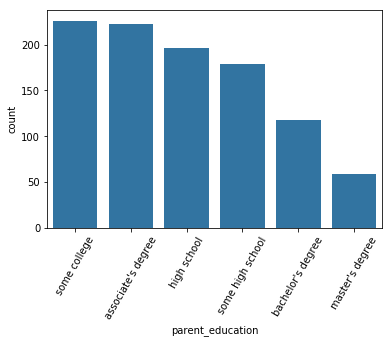

In [75]:
#counts of the level of education of the students' parents
base_color=sb.color_palette()[0]
gen_order=performance_data['parent_education'].value_counts().index
sb.countplot(data=performance_data, x="parent_education",color=base_color,order=gen_order)
plt.xticks(rotation=60);

#### The majority of the students' parents have attended some college, with the least parents having completed the master's degree level.

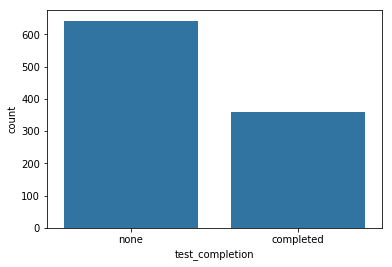

In [76]:
#counts of test completion
base_color=sb.color_palette()[0]
gen_order=performance_data['test_completion'].value_counts().index
sb.countplot(data=performance_data, x="test_completion",color=base_color,order=gen_order);

#### Majority of the students did not do the test preparation course prior to doing the test.

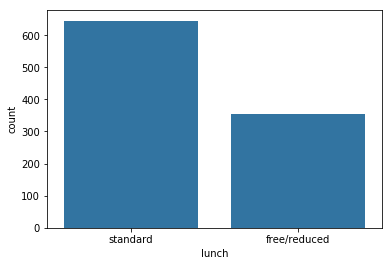

In [77]:
#counts of the lunch details
base_color=sb.color_palette()[0]
gen_order=performance_data['lunch'].value_counts().index
sb.countplot(data=performance_data, x="lunch",color=base_color,order=gen_order);


#### It is clear that students who are able to afford the standard lunch exceed those who can't, i.e., those who take free/reduced lunch.

### Now I will create plots to check the distribution of various variables.

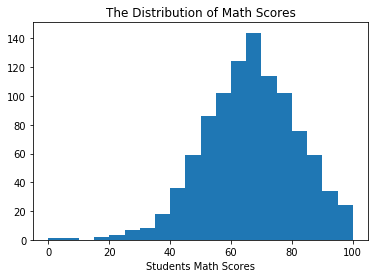

In [78]:
# Distribution of math score
# Create bins with step-size 5
bins = np.arange(0, performance_data['math'].max()+5, 5)
plt.hist(data = performance_data, x = 'math', bins = bins)
plt.xlabel('Students Math Scores')
plt.title("The Distribution of Math Scores");

#### This distribution is close to normal. Many students had a math score of between 60 and 80.

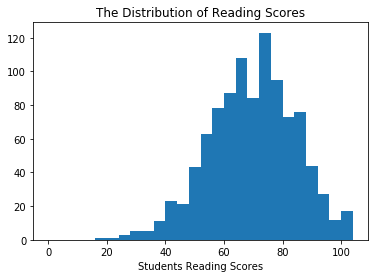

In [79]:
# Distribution of reading score
# Create bins with step-size 4
bins = np.arange(0, performance_data['reading'].max()+5, 4)
plt.hist(data = performance_data, x = 'reading', bins = bins)
plt.xlabel('Students Reading Scores')
plt.title("The Distribution of Reading Scores");

#### This is distribution is bimodal with peaks at around 65 and another peak at around 75. Few students had scores of less than 40.

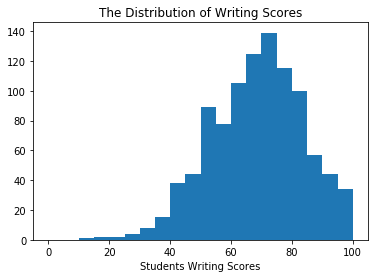

In [80]:
# Distribution of writing score
# Create bins with step-size 4
bins = np.arange(0, performance_data['writing'].max()+5, 5)
plt.hist(data = performance_data, x = 'writing', bins = bins)
plt.xlabel('Students Writing Scores')
plt.title("The Distribution of Writing Scores");

#### This is a bimodal distribution with peaks at 50 and 75. Very few students had a writing score of less than 40, with many students scoring between 60 and 80.

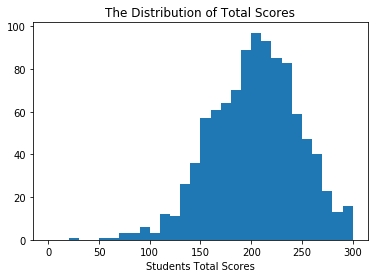

In [81]:
# Distribution of total score
# Create bins with step-size 4
bins = np.arange(0, performance_data['total'].max()+10, 10)
plt.hist(data = performance_data, x = 'total', bins = bins)
plt.xlabel('Students Total Scores')
plt.title("The Distribution of Total Scores");

#### This is a unimodal distribution with a peak at around 210 total score. Very few students had a total score of less than 100, with most students scoring a total of between 200 and 250 total score. Therefore, many students performed above average.

### Distributions of Student's Performance Dataset Variables
The distributions observed are a near-normal distribution for math score, bimodal distributions for reading and writing and an unimodal distribution for the total score variable.
It is interesting that for both math and writing, many students had a score of between 60 and 80.

### Unusual Distributions I noted and adjustments made.
The unusual distributions observed is the total score distribution with a unimodal peak at around 210, and the bimodal distributions for writing with peaks at 50 and 75 and reading with peaks at 65 and 75. However, there is no need of any adjustments.


## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data. 

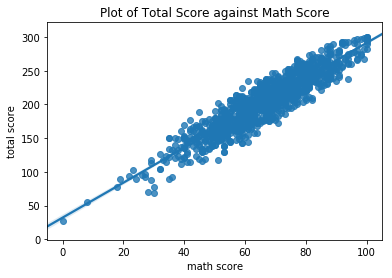

In [82]:
#Scatter plot of total score against math score
sb.regplot(data=performance_data,x='math',y='total')
plt.xlabel('math score')
plt.ylabel('total score')
plt.title('Plot of Total Score against Math Score');

#### There is a positive relationship between the total score and math score. An increase in math score leads to an in increase in the total score. Therefore, for a student's performance to increase, the math score should also increase.

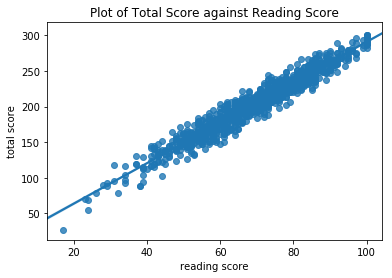

In [83]:
#Scatter plot of total score against reading score
sb.regplot(data=performance_data,x='reading',y='total')
plt.xlabel('reading score')
plt.ylabel('total score')
plt.title('Plot of Total Score against Reading Score');

#### There is also a positive relationship between the total score and reading score. An increase in reading score leads to an in increase in the total score. Therefore, for a student's performance to increase, the reading score should also increase.

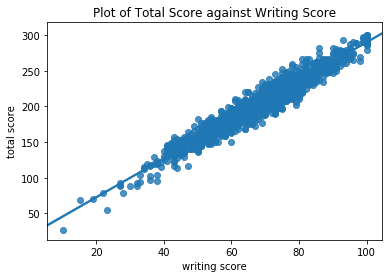

In [84]:
#Scatter plot of total score against writing score
sb.regplot(data=performance_data,x='writing',y='total')
plt.xlabel('writing score')
plt.ylabel('total score')
plt.title('Plot of Total Score against Writing Score');

#### Similarly, I note a positive relationship between total score and writing score. 

#### This is expected because to increase the overall performance of a student, then it is obvious that the student must excel in all the tests; math, reading, and writing.


#### I will now create a heatmap to display the correlation between the quantitative variables.

In [85]:
quantitatives=['math','reading','writing','total']

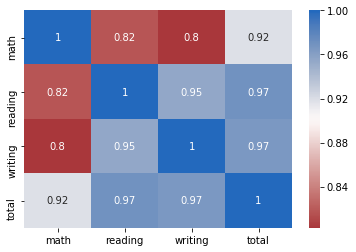

In [86]:
sb.heatmap(performance_data[quantitatives].corr(), cmap = 'vlag_r', annot = True);


#### The correlation coefficient between total score and math is 0.92, which is just a bit lower than between total score and reading(0.97) and writing(0.97). However, all these show a strong positive relationship between all the subjects and total score. It is interesting that the correlation of writing and reading with total score is similar, i.e., 0.97.

#### Now plotting heat map between the qualitative variables.

In [87]:
# gender and test_completion
ct_counts = performance_data.groupby(['gender', 'test_completion']).size()


In [88]:
# Convert series into dataframe
ct_counts = ct_counts.reset_index(name='count')
# Rearranging the data
ct_counts = ct_counts.pivot(index = 'gender', columns = 'test_completion', values = 'count')


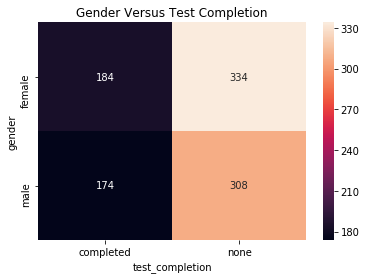

In [89]:
#Plotting the heat map
sb.heatmap(ct_counts, annot = True, fmt = 'd')
plt.title('Gender Versus Test Completion');

#### There is a closer ratio for the females who completed the preparation test and a distant ratio for males who completed the preparation test.

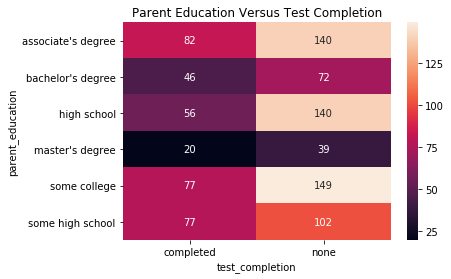

In [90]:
#parental education and text completion
ct_counts2 = performance_data.groupby(['parent_education', 'test_completion']).size()
ct_counts2 = ct_counts2.reset_index(name='count')
ct_counts2 = ct_counts2.pivot(index = 'parent_education', columns = 'test_completion', values = 'count')
sb.heatmap(ct_counts2, annot = True, fmt = 'd');
plt.title('Parent Education Versus Test Completion');

#### The students whose parents have an associate degree are the ones who mostly completed the preparation test. The students whose parents attended some college are the ones who mostly failed to complete the preparation test. 

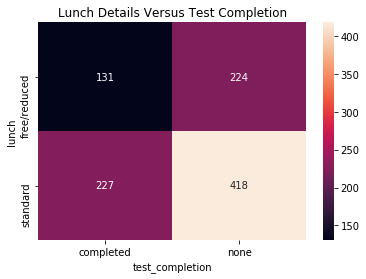

In [91]:
# Lunch details versus text completion
ct_counts3 = performance_data.groupby(['lunch', 'test_completion']).size()
ct_counts3 = ct_counts3.reset_index(name='count')
ct_counts3 = ct_counts3.pivot(index = 'lunch', columns = 'test_completion', values = 'count')
sb.heatmap(ct_counts3, annot = True, fmt = 'd')
plt.title('Lunch Details Versus Test Completion');

#### It is interesting to note that the students who receive standard lunch are the ones who mostly completed the preparation test. Similarly, the students who mostly did not complete the test preparation test are those who take standard lunch.

### How my variables of interest vary with other variables in the dataset.
There is a strong positive relation between total score and math score, which means that an increase in math score leads to an increase in the total score, i.e., the overall performance of the student. The same is noted with writing and reading scores, each having a correlation coefficient of 0.97. This means that there is a stronger relationship between the students overall score and both the writing and reading scores.

### Interesting relationships between other features. 

There is a closer ratio for the females who completed the preparation test and a distant ratio for males who completed the preparation test. 
The students whose parents have an associate degree are the ones who mostly completed the preparation test. The students whose parents attended some college are the ones who mostly failed to complete the preparation test.  It is interesting to note that the students who receive standard lunch are the ones who mostly completed the preparation test. Similarly, the students who mostly did not complete the test preparation test are those who take standard lunch.

## Multivariate Exploration

In this section, I will investigate how lunch details, parental education, completion of test preparation course and gender affect the bivariate relationships analyzed above against total score.

First analyzing how a student lunch details affect the relationship between total score and math score.



Faceting the bivariate plots above to carry out the multivariate exploration


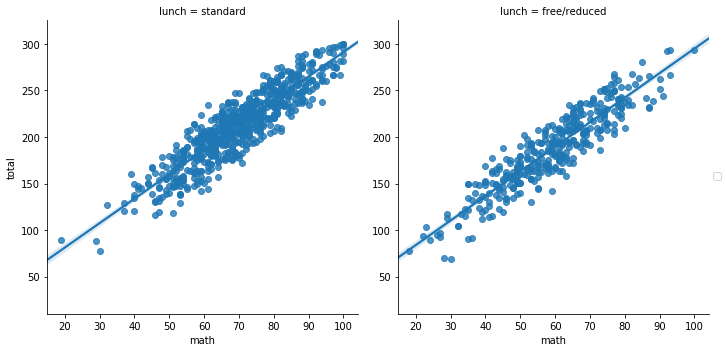

In [92]:
# Lunch details, math score and total score
g = sb.FacetGrid(data = performance_data, col = 'lunch', size = 5, aspect=1)
g.map(sb.regplot,'math', 'total')

g.add_legend();

A student's lunch details has no effect on the bivariate relationship between the total score and math score.

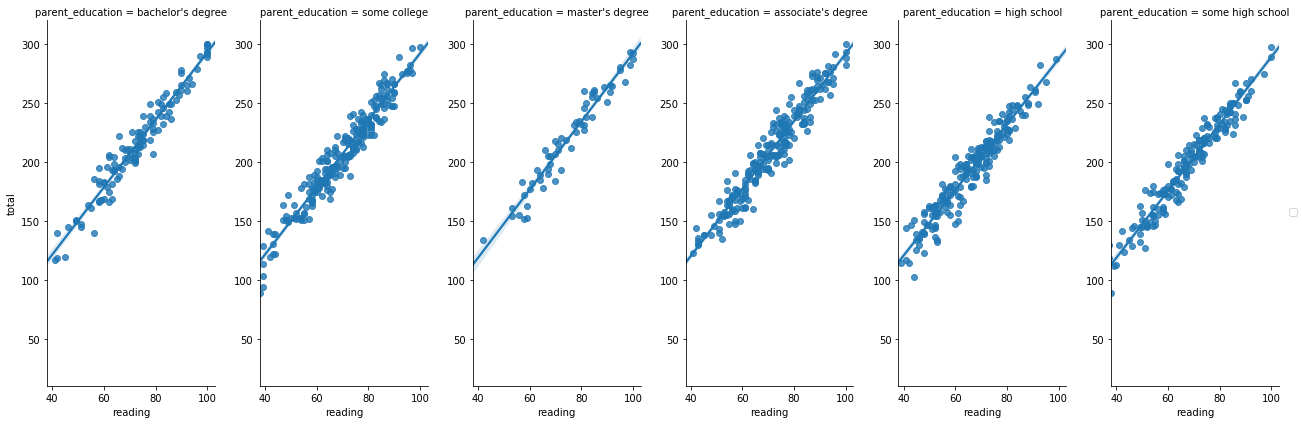

In [93]:
# Parental Education, reading score and total score
g = sb.FacetGrid(data = performance_data, col = 'parent_education', size = 6, aspect=0.5)
g.map(sb.regplot,'reading','total')
g.add_legend();


Parental education has very little/no effect on the bivariate relationship between total score and reading score.

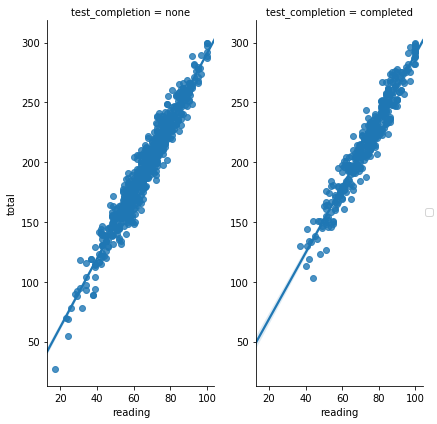

In [94]:
# Course Test Completion, writing score and total score
g = sb.FacetGrid(data = performance_data, col = 'test_completion', size = 6, aspect=0.5)
g.map(sb.regplot,'reading','total')
g.add_legend();

Completion of the test preparation course has no effect on the bivariate relationship between the total score and reading score.

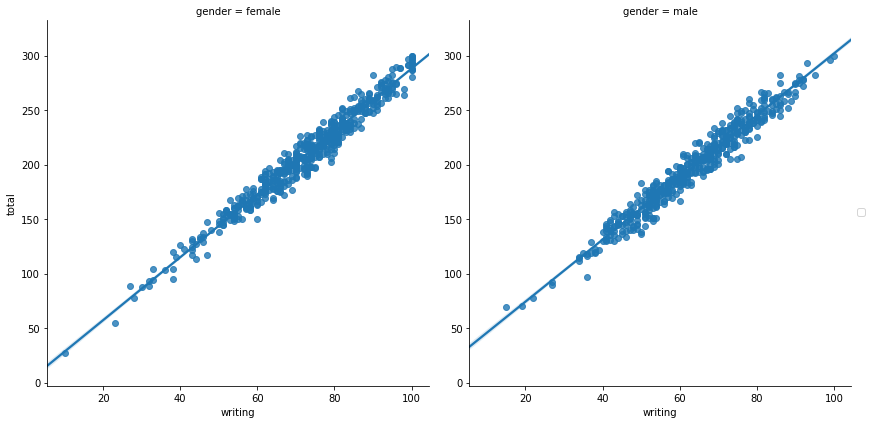

In [95]:
# Gender, math score and total score
g = sb.FacetGrid(data = performance_data, col = 'gender', size = 6)
g.map(sb.regplot,'writing','total')
g.add_legend();

A student's gender has no effect on the bivariate relationship between the total score and writing score.

### Interesting Interactions between features.


From the above interactions, it is interesting to note that lunch details, gender, parental education and completion of the test preparation course do not affect the relationship between the test scores. Therefore, it is good to conclude that based on this interactions, the overall score of a student can only be affected by the individual scores. The other features have very little or no effect on the relationship between the overall score and other tests. 

## Conclusions


I performed a data exploration on the Student Examination Performance dataset. This dataset includes features such as student's gender, ethnicity, parental education, lunch details, completion of the test preparation course,  I performed a preliminary data wrangling before prooceeding with data exploration, which included checking for and handling duplicates, null entries, data redundancy, renaming columns, etc. I then went ahead to perform three types of exploration: univariate, bivariate and multivariate exploration.The key conclusions derived from each exploration are:

Univariate exploration:
The female counts exceed the male counts by around 50.

The majority of the students' parents have attended some college, with the least parents having completed the master's degree level.

Majority of the students did not do the test preparation course prior to doing the test.

It is clear that students who are able to afford the standard lunch exceed those who can't, i.e., those who take free/reduced lunch.

Math score distribution is close to normal. Many students had a math score of between 60 and 80.

Reading score distribution is bimodal with peaks at around 65 and another peak at around 75. Few students had scores of less than 40.

Writing score is bimodal distribution with peaks at 50 and 75. Very few students had a writing score of less than 40, with many students scoring between 60 and 80.

Total score is a unimodal distribution with a peak at around 210 total score. Very few students had a total score of less than 100, with most students scoring a total of between 200 and 250 total score. Therefore, many students performed above average.


Bivariate Exploration:

There is a positive relationship between the total score and math score. An increase in math score leads to an in increase in the total score. Therefore, for a student's performance to increase, the math score should also increase.

There is also a positive relationship between the total score and reading score. An increase in reading score leads to an in increase in the total score. Therefore, for a student's performance to increase, the reading score should also increase.

The correlation coefficient between total score and math is 0.92, which is just a bit lower than between total score and reading(0.97) and writing(0.97). However, all these show a strong positive relationship between all the subjects and total score. It is interesting that the correlation of writing and reading with total score is similar, i.e., 0.97.

There is a closer ratio for the females who completed the preparation test and a distant ratio for males who completed the preparation test.

The students whose parents have an associate degree are the ones who mostly completed the preparation test. The students whose parents attended some college are the ones who mostly failed to complete the preparation test.

It is interesting to note that the students who receive standard lunch are the ones who mostly completed the preparation test. Similarly, the students who mostly did not complete the test preparation test are those who take standard lunch.


Multivariate Exploration:
From the above interactions, it is interesting to note that lunch details, gender, parental education and completion of the test preparation course do not affect the relationship between the test scores. Therefore, it is good to conclude that based on this interactions, the overall score of a student can only be affected by the individual scores. The other features have very little or no effect on the relationship between the overall score and other tests.

#### Now I will save the cleaned dataset for analysis in Part II of exploration.


In [98]:
performance_data.to_csv('performance_data_cleaned.csv')